# <b><u> Creating Experiments

<b>Method1:-using create_experiment()

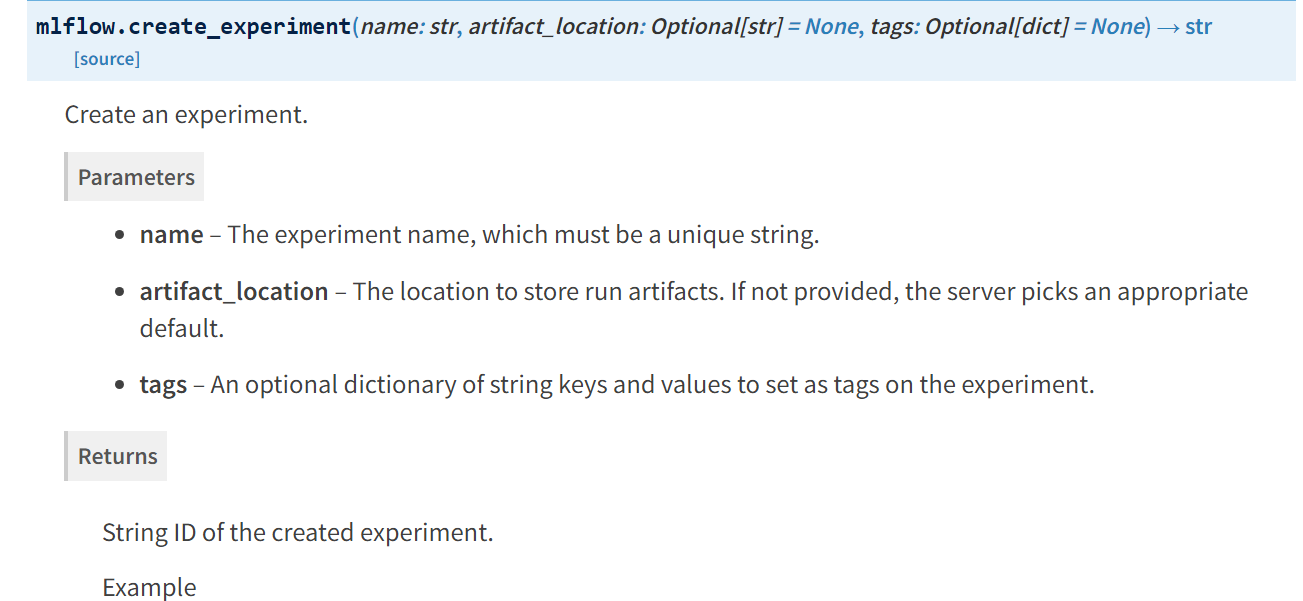

In [1]:
!pwd

/home/pandey/desktop/mlflow_for_ml_dev_master/mlflow_for_ml_dev/notebooks/experiment_tracking_fundamentals


setting tracking uri

In [1]:
from pathlib import Path
import mlflow

mlruns_path = Path(r'E:\linux backup\desktop\mlflow_for_ml_dev_master\mlruns')
mlflow.set_tracking_uri(uri=mlruns_path.as_uri())


creating experiment

In [2]:
experiment_id = mlflow.create_experiment(
    "creating-experiments", # name
    tags={
    "topic":"experiment-management",
    "version": "v1"}
    )

print(f"Experiment created with ID: {experiment_id}")

Experiment created with ID: 581866939967920430


**Notes**:

If the experiment name already exists, the method will throw an exception. Finally, creating the experiment using the method `create_experiment` does not mean that it will be automatically detected by other mlflow functions within the current Python context. Unless you specify the experiment ID, the runs will be stored under the `Default` Experiment (if there is no other active experiment). Therefore, we need to specify the newly created experiment as the active experiment using `mlflow.set_experiment`.

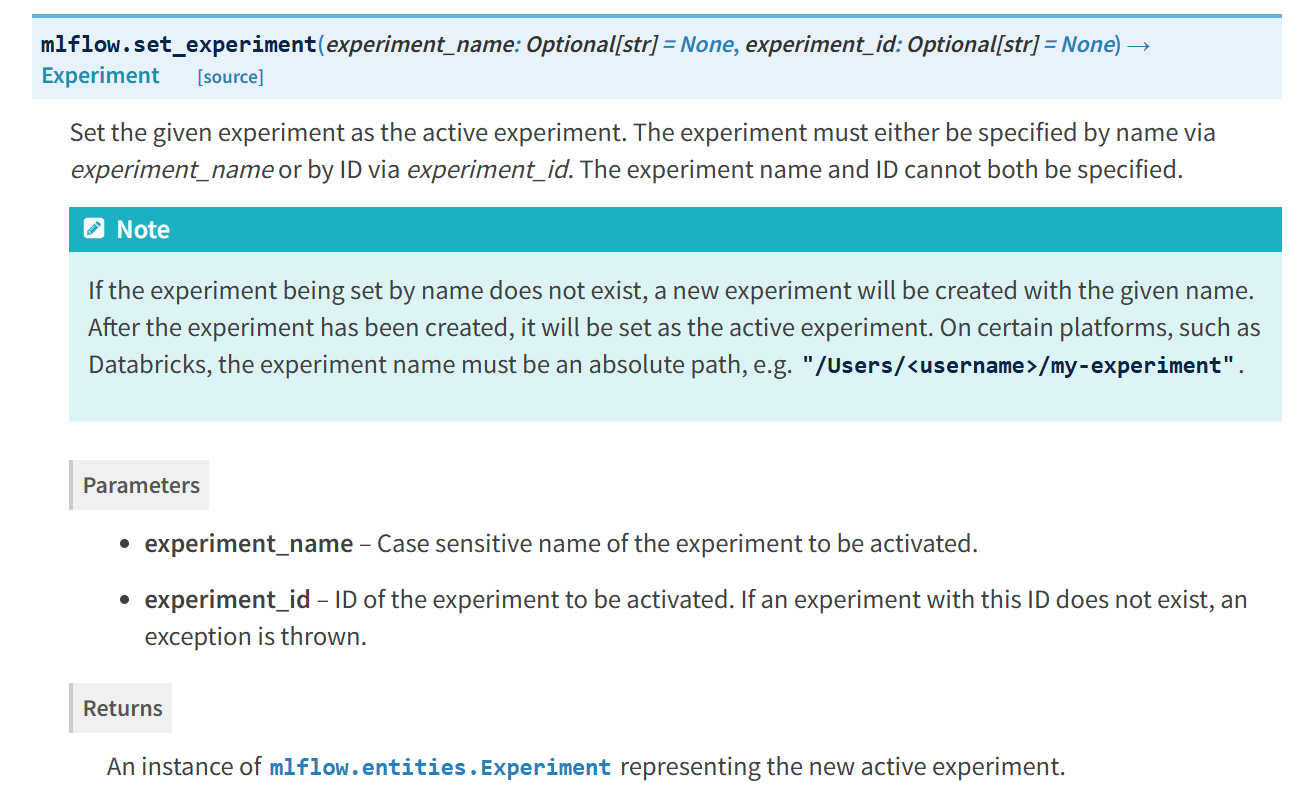

In [3]:
# Here we start a new run without specifying the experiment_id or having called mlflow.set_experiment()
# This will create a new run in the default experiment
with mlflow.start_run() as run:
    print(f"Active run_id: {run.info.run_id}")

Active run_id: 12c44dd50c8a48a98c2e1b3bcff848e9


making our experiment as Active Experiment

In [4]:
# We set the experiment to the one we created earlier.
experiment = mlflow.set_experiment(experiment_name="creating-experiments")

creating a new runs

In [5]:
# Now we start a new run, this will create a new run in the experiment we set
with mlflow.start_run() as run:
    print(f"Active run_id: {run.info.run_id}")

Active run_id: 3aeb4eedd8854048bf24653a78766cc9


In [6]:
mlflow.end_run()

<b>Method2:-using set_experiment()

**Notes:**

We can use `mlflow.set_experiment` to create a new experiment, if the name we are providing in the parameter `experiment_name` has not been taken by other experiments, mlflow will create a new experiment using this name, the caviat here is that we cannot provide tags or specify the artifact location for the experiments created in this way.

In [7]:
# set the experiment
experiment = mlflow.set_experiment(experiment_name="creating-experiments-new")

2025/08/19 21:11:19 INFO mlflow.tracking.fluent: Experiment with name 'creating-experiments-new' does not exist. Creating a new experiment.


In [8]:
experiment.experiment_id

'426003432083814942'

In [9]:
# set the experiment
experiment = mlflow.set_experiment(experiment_id=experiment.experiment_id+"5")

MlflowException: Could not find experiment with ID 4260034320838149425